<h1>Perceptron in scikit-learn</h1>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np 

Loading iris data from sklearn

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f"Class labels: {np.unique(y)}")
print(f"Predictors: {X[0:6]} with shape {X.shape}\nResponses {y[0:6]} with shape {y.shape}")

Class labels: [0 1 2]
Predictors: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]] with shape (150, 2)
Responses [0 0 0 0 0 0] with shape (150,)


Splitting data into training and testing sets, where 70% of the data is trainig data the rest is testing data. Random state is the seed variable for rng and stratify ensures that the proportion of class labels in training and testing data remains samilar.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1, stratify = y)

In [4]:
print(f"Dataset class label counts: {np.bincount(y)}")
print(f"Training data class label counts: {np.bincount(y_train)}")
print(f"Testing data class label counts: {np.bincount(y_test)}")

Dataset class label counts: [50 50 50]
Training data class label counts: [35 35 35]
Testing data class label counts: [15 15 15]


Feature Scaling, standardizing the data for optimal performance.

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Training a perceptron to classify flowers into three different classes.

In [6]:
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

Using the trained perceptron to make predictions on the testing data and reporting the error and accuracy of the model.

In [7]:
preds = ppn.predict(X_test_std)
num_misclassification = sum(y_test != preds)
print(f"Number of misclassifications: {num_misclassification}\nMisclassification error: {(num_misclassification / len(y_test)) * 100}\nAccuracy: {(1 - (num_misclassification / len(y_test))) * 100}")

Number of misclassifications: 1
Misclassification error: 2.2222222222222223
Accuracy: 97.77777777777777


Using sklearn's and the perceptron's built in accuracy calculators

In [8]:
print(f"Accuracy (sklearn accuracy_score): {accuracy_score(preds, y_test)}")
print(f"Accuracy (Perceptron accuracy): {ppn.score(X_test_std, y_test)}")

Accuracy (sklearn accuracy_score): 0.9777777777777777
Accuracy (Perceptron accuracy): 0.9777777777777777


Vizualizaition of the learned parameters and decision boundaries

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [10]:
# This is visualization code taken straight from the book

def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

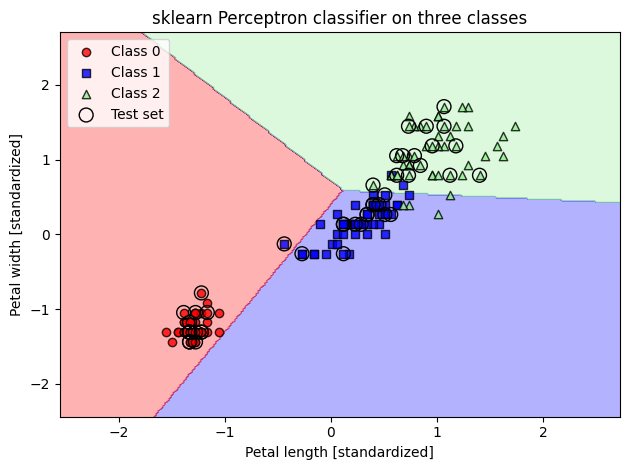

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title("sklearn Perceptron classifier on three classes")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Here, the classes are not linearly separable, so the perceptron algorithm does not converge

<h1>Logistic Regression</h1>

In [12]:
# sigmoid activation function
def sigmoid(z):
    return 1 / (1 + (np.e ** -z))

# loss function for when y = 0
def loss_0(z):
    return -np.log(1 - sigmoid(z))

# loss function for when y = 1 
def loss_1(z):
    return -np.log(sigmoid(z))

Loss function for a single training example

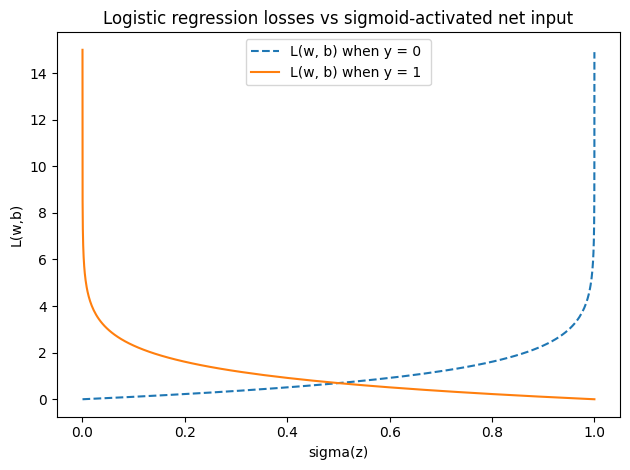

In [19]:
z = np.arange(-15, 15, 0.1)
sigma_z = sigmoid(z)
losses_0 = [loss_0(x) for x in z]
losses_1 = [loss_1(x) for x in z]
plt.plot(sigma_z, losses_0, linestyle = "--", label = "L(w, b) when y = 0 ")
plt.plot(sigma_z, losses_1, label = "L(w, b) when y = 1 ")
plt.xlabel("sigma(z)")
plt.ylabel("L(w,b)")
plt.title("Logistic regression losses vs sigmoid-activated net input")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
from LogisticRegressionGD import LogisticRegressionGD

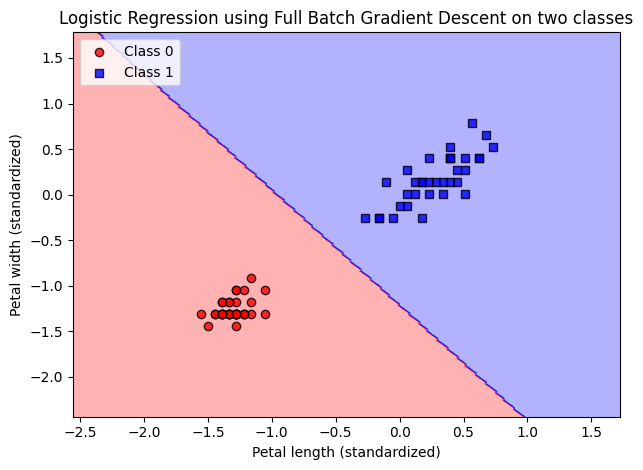

In [20]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrGD = LogisticRegressionGD(eta=0.1, n_iter=1000, random_state=1)
lrGD.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrGD)
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("Logistic Regression using Full Batch Gradient Descent on two classes")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()